## Load data
有dictionary 文档。

当时得奖的方案有：
* DocSpot认为，“正确”的护理对每个人而言意味着完全不同的事物，并且医生与患者一样多层面。考虑到这一点，我们开发了多种创新方式，供用户搜索，过滤和选择适合自己独特需求的提供商。DocSpot提供的信息使每个用户都能快速找到适合其个人需求的提供者。
* 纽约州医疗保健消费者的HealthRank，能够确定最能满足其个人健康需求的医院。HealthRank使用OPEN NY提供的公开医院住院病人出院数据来提供易于使用，可自定义的医院排名列表，这可以使纽约人能够自己做出更明智的医疗决策。
* 基于地图的搜索工具，可根据客户的偏好（例如成本，距离和质量）在该地区找到医院。

In [1]:
import numpy as np
import pandas as pd

from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
ls gdrive/My\ Drive/BigData/Project/Data

SPARCS-2016.csv  SPARCS-2017.csv


In [3]:
data2016 = pd.read_csv('/content/gdrive/My Drive/BigData/Project/Data/SPARCS-2016.csv', encoding = "ISO-8859-1")
data2016.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Health Service Area,Hospital County,Operating Certificate Number,Facility Id,Facility Name,Age Group,Zip Code - 3 digits,Gender,Race,Ethnicity,Length of Stay,Type of Admission,Patient Disposition,Discharge Year,CCS Diagnosis Code,CCS Diagnosis Description,CCS Procedure Code,CCS Procedure Description,APR DRG Code,APR DRG Description,APR MDC Code,APR MDC Description,APR Severity of Illness Code,APR Severity of Illness Description,APR Risk of Mortality,APR Medical Surgical Description,Payment Typology 1,Payment Typology 2,Payment Typology 3,Birth Weight,Abortion Edit Indicator,Emergency Department Indicator,Total Charges,Total Costs
0,Western NY,Allegany,226700.0,37.0,Cuba Memorial Hospital Inc,70 or Older,147,F,White,Not Span/Hispanic,3,Urgent,Home or Self Care,2016,122,Pneumonia (except that caused by tuberculosis ...,0,NO PROC,139,Other pneumonia,4,Diseases and Disorders of the Respiratory System,2,Moderate,Moderate,Medical,Medicare,Private Health Insurance,NaN,0,N,N,3913.23,3466.83
1,Western NY,Allegany,226700.0,37.0,Cuba Memorial Hospital Inc,30 to 49,147,M,White,Not Span/Hispanic,2,Elective,Home or Self Care,2016,122,Pneumonia (except that caused by tuberculosis ...,0,NO PROC,139,Other pneumonia,4,Diseases and Disorders of the Respiratory System,1,Minor,Minor,Medical,Self-Pay,NaN,NaN,0,N,Y,3597.10,3746.80
2,Western NY,Allegany,226700.0,37.0,Cuba Memorial Hospital Inc,50 to 69,147,F,White,Not Span/Hispanic,7,Urgent,Home or Self Care,2016,127,Chronic obstructive pulmonary disease and bron...,0,NO PROC,140,Chronic obstructive pulmonary disease,4,Diseases and Disorders of the Respiratory System,1,Minor,Minor,Medical,Medicare,Federal/State/Local/VA,NaN,0,N,Y,9149.22,8322.10
3,Western NY,Allegany,226700.0,37.0,Cuba Memorial Hospital Inc,70 or Older,147,M,White,Not Span/Hispanic,4,Urgent,Home or Self Care,2016,122,Pneumonia (except that caused by tuberculosis ...,0,NO PROC,139,Other pneumonia,4,Diseases and Disorders of the Respiratory System,2,Moderate,Moderate,Medical,Medicare,Medicaid,NaN,0,N,Y,5880.61,5828.87
4,Western NY,Allegany,226700.0,37.0,Cuba Memorial Hospital Inc,50 to 69,147,M,White,Not Span/Hispanic,5,Elective,Home or Self Care,2016,122,Pneumonia (except that caused by tuberculosis ...,202,ELECTROCARDIOGRAM,139,Other pneumonia,4,Diseases and Disorders of the Respiratory System,2,Moderate,Moderate,Medical,Blue Cross/Blue Shield,NaN,NaN,0,N,Y,7019.76,6604.00


## 2. EDA

In [4]:
np.shape(data2016)

(2343429, 34)

In [5]:
data2016.dtypes

Health Service Area                     object
Hospital County                         object
Operating Certificate Number           float64
Facility Id                            float64
Facility Name                           object
Age Group                               object
Zip Code - 3 digits                     object
Gender                                  object
Race                                    object
Ethnicity                               object
Length of Stay                          object
Type of Admission                       object
Patient Disposition                     object
Discharge Year                           int64
CCS Diagnosis Code                       int64
CCS Diagnosis Description               object
CCS Procedure Code                       int64
CCS Procedure Description               object
APR DRG Code                             int64
APR DRG Description                     object
APR MDC Code                             int64
APR MDC Descr

In [6]:
data2016.count()

Health Service Area                    2338104
Hospital County                        2338104
Operating Certificate Number           2338104
Facility Id                            2338104
Facility Name                          2343429
Age Group                              2343429
Zip Code - 3 digits                    2307214
Gender                                 2343429
Race                                   2343429
Ethnicity                              2343429
Length of Stay                         2343429
Type of Admission                      2343429
Patient Disposition                    2343429
Discharge Year                         2343429
CCS Diagnosis Code                     2343429
CCS Diagnosis Description              2343429
CCS Procedure Code                     2343429
CCS Procedure Description              2343429
APR DRG Code                           2343429
APR DRG Description                    2343429
APR MDC Code                           2343429
APR MDC Descr

Some of the data are missing, especially "Payment Typology 2" and "Payment Typology 3".
Maybe we could discard null records for other columns

In [8]:
data2016.nunique()

Health Service Area                          8
Hospital County                             57
Operating Certificate Number               174
Facility Id                                211
Facility Name                              214
Age Group                                    5
Zip Code - 3 digits                         50
Gender                                       3
Race                                         4
Ethnicity                                    4
Length of Stay                             227
Type of Admission                            6
Patient Disposition                         19
Discharge Year                               1
CCS Diagnosis Code                         264
CCS Diagnosis Description                  264
CCS Procedure Code                         226
CCS Procedure Description                  226
APR DRG Code                               316
APR DRG Description                        316
APR MDC Code                                26
APR MDC Descr

### Distribution of column values

In [9]:
set(data2016["Health Service Area"])

{'Capital/Adirond',
 'Central NY',
 'Finger Lakes',
 'Hudson Valley',
 'Long Island',
 'New York City',
 'Southern Tier',
 'Western NY',
 nan}

Text(0.5, 1.0, 'Health Service Area (NY state)')

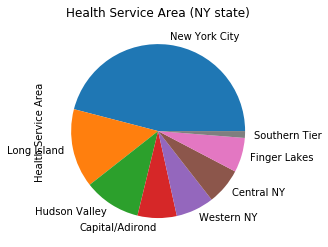

In [49]:
data2016["Health Service Area"].value_counts().plot.pie(
    
)
plt.title("Health Service Area (NY state)")

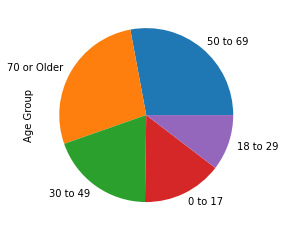

In [11]:
data2016["Age Group"].value_counts().plot(kind="pie")

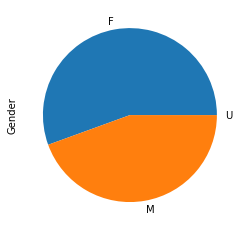

In [12]:
data2016["Gender"].value_counts().plot(kind="pie")

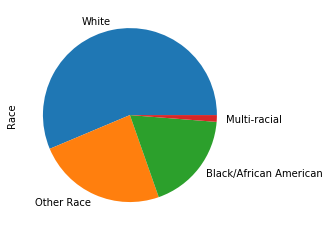

In [13]:
data2016["Race"].value_counts().plot(kind="pie")

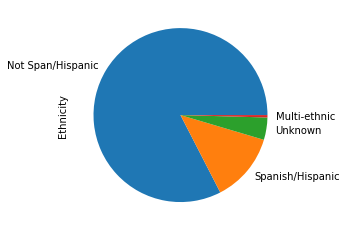

In [15]:
data2016["Ethnicity"].value_counts().plot(kind="pie")

Text(0.5, 1.0, 'Type of Admission')

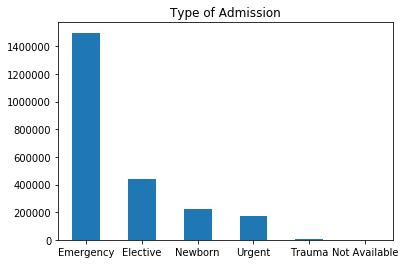

In [38]:
data2016["Type of Admission"].value_counts().plot(kind="bar",rot=0)
plt.title("Type of Admission")

Text(0.5, 1.0, 'APR Severity of Illness Description')

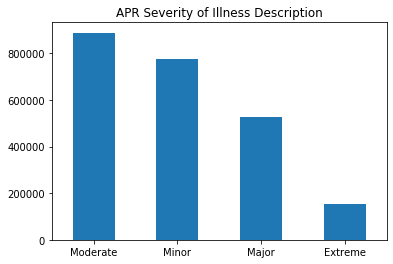

In [37]:
data2016["APR Severity of Illness Description"].value_counts().plot(kind="bar",rot=0)
plt.title("APR Severity of Illness Description")

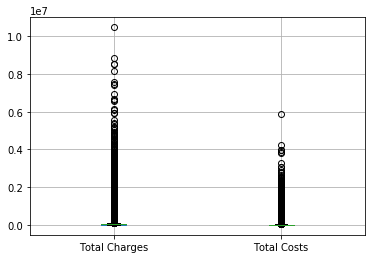

In [22]:
data2016.boxplot(column=['Total Charges','Total Costs'])

Text(0.5, 1.0, 'Distribution of costs')

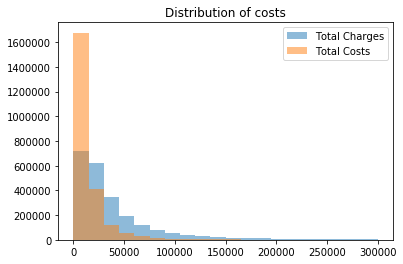

In [36]:
import matplotlib.pyplot as plt
plt.hist(data2016["Total Charges"],bins=20,range=(0,300000),alpha=0.5,label="Total Charges")
plt.hist(data2016["Total Costs"],bins=20,range=(0,300000),alpha=0.5,label="Total Costs")
plt.legend()
plt.title("Distribution of costs")

Text(0.5, 1.0, 'Length of Stay (Top 8)')

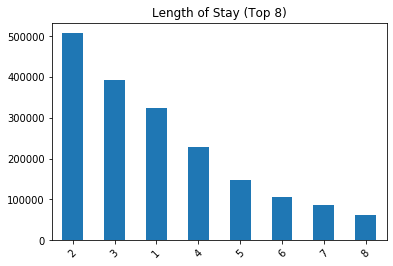

In [39]:
data2016["Length of Stay"].value_counts()[:8].plot(kind="bar",rot=45)
plt.title("Length of Stay (Top 8)")

Text(0.5, 1.0, 'Hospital County (Top 8)')

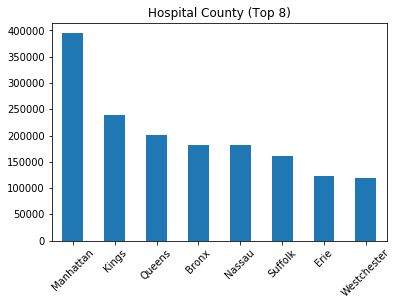

In [40]:
data2016["Hospital County"].value_counts()[:8].plot(kind="bar",rot=45)
plt.title("Hospital County (Top 8)")

Text(0.5, 1.0, 'Facility Name (Top 8)')

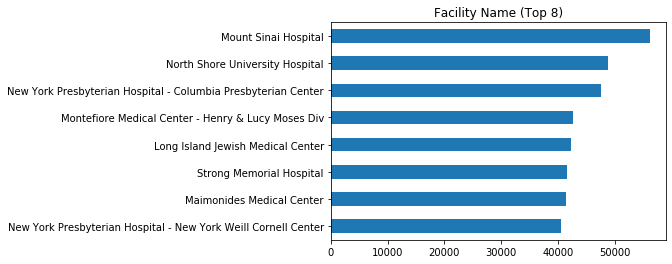

In [47]:
data2016["Facility Name"].value_counts()[::-1][-8:].plot.barh()
plt.title("Facility Name (Top 8)")